#                              Bank Personal Loan Campaign

### About the data

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Context:

This case is about a bank whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Feature Description:

**ID** : Customer ID

**Age** : Customer's age in completed years

**Experience** : #years of professional experience

**Income** : Annual income of the customer (000)

**ZIPCode** : Home Address ZIP code

**Family** : Family size of the customer

**CCAvg** : Avg. spending on credit cards per month (000)

**Education** : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

**Mortgage** : Value of house mortgage if any. (000)

**Personal Loan** :Did this customer accept the personal loan offered in the last campaign? 0 - False and 1 - True

**Securities Account** : Does the customer have a securities account with the bank? 0 - False and 1 - True

**CD Account** : Does the customer have a certificate of deposit (CD) account with the bank? 0 - False and 1 - True

**Online** : Does the customer use internet banking facilities? 0 - False and 1 - True

**CreditCard** : Does the customer use a credit card issued by Universal Bank? 0 - False and 1 - True

### Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\admin\Downloads\Bank_Personal_Loan_Data (1).csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
data.shape

(5000, 14)

In [5]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No missing values are present

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


There are negative values in 'Experience'. Let's replace it.

In [8]:
data['Experience']=data['Experience'].abs()
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


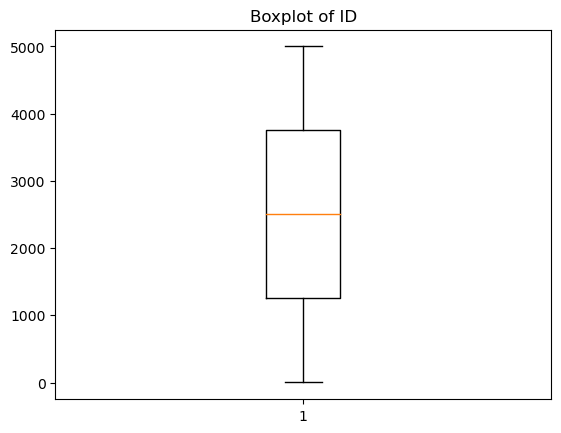

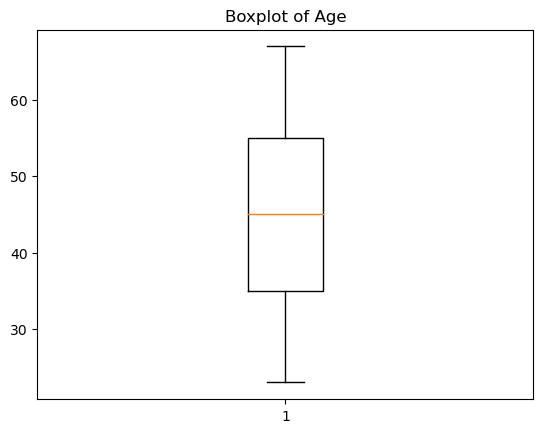

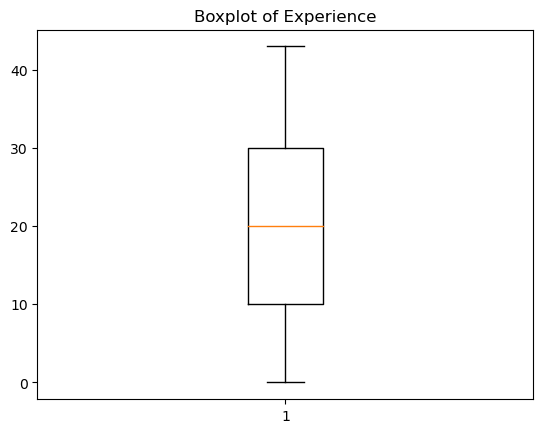

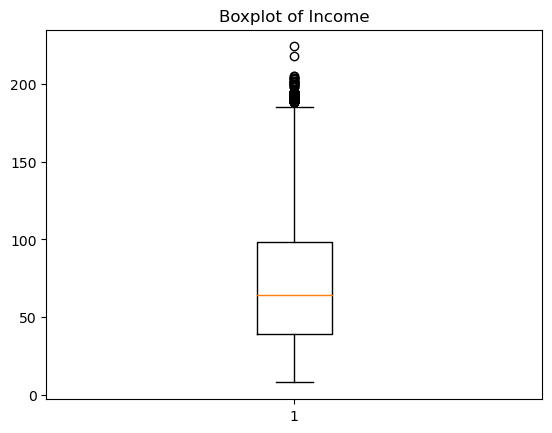

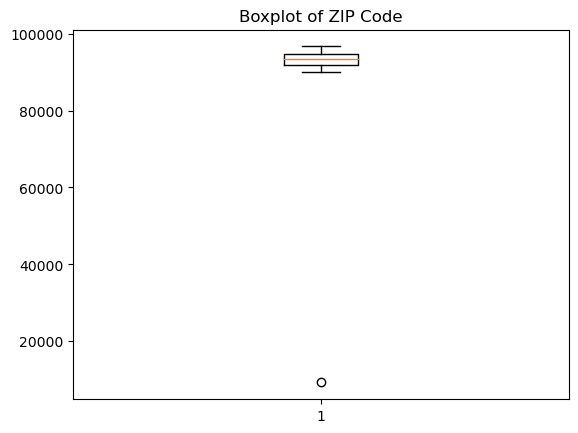

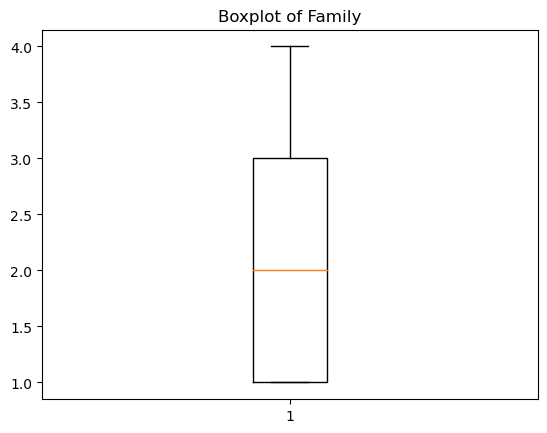

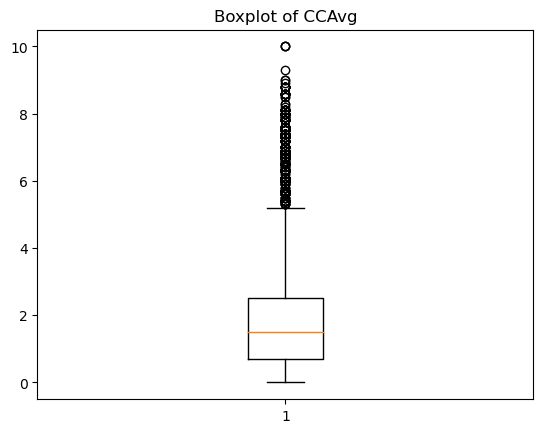

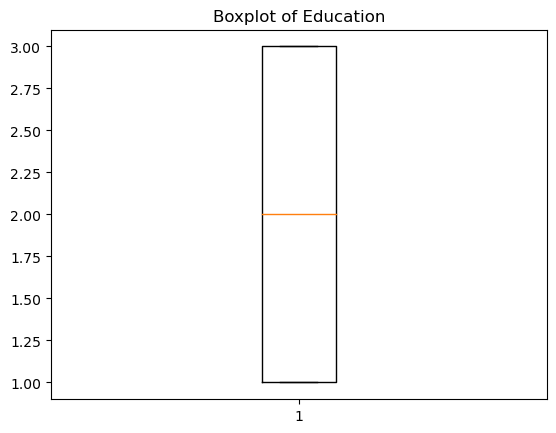

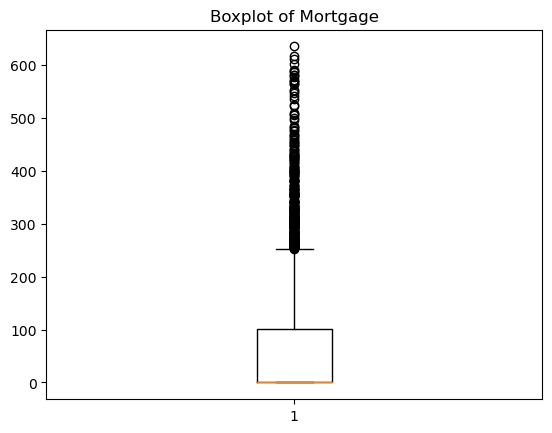

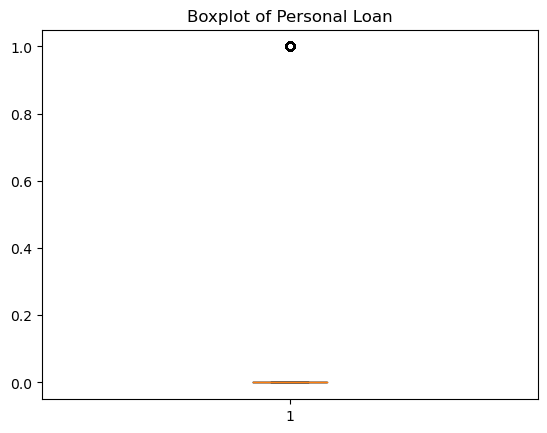

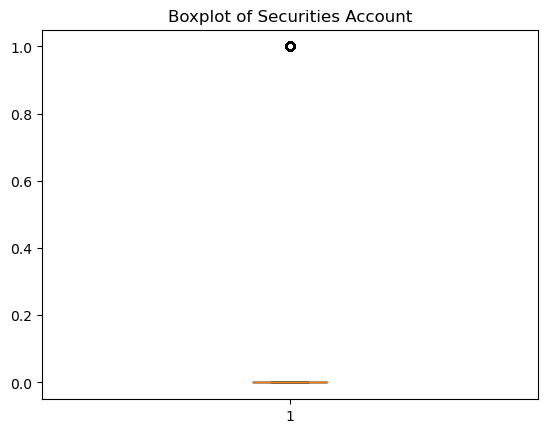

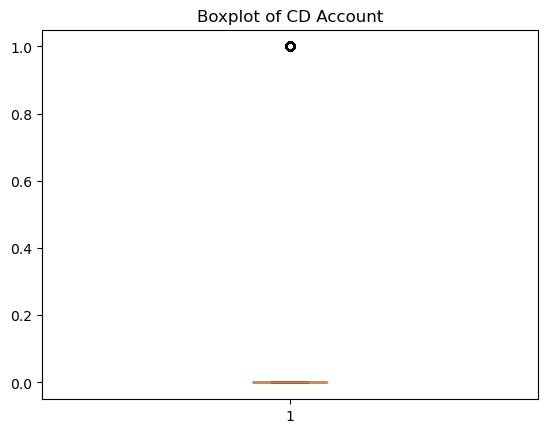

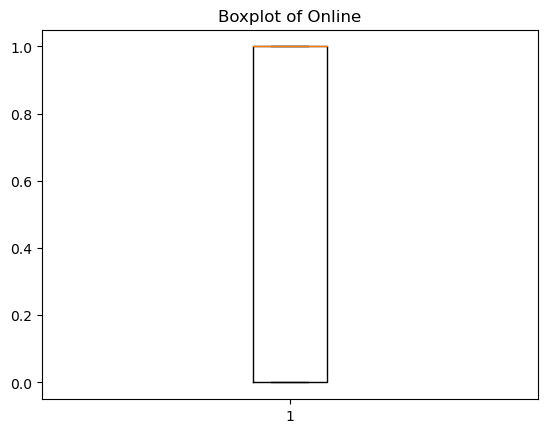

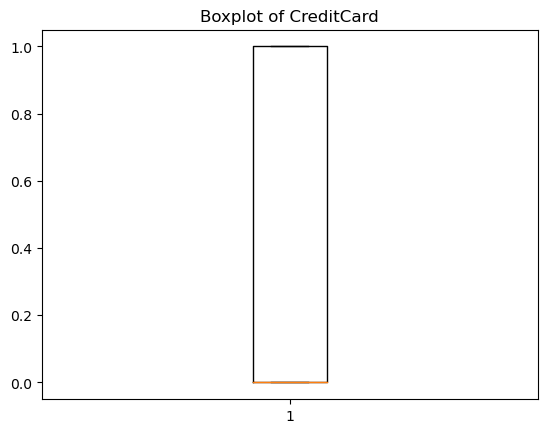

In [9]:
#check outliers
numerical_columns = data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.boxplot(data[column])
    plt.title("Boxplot of "+column)
    plt.show()

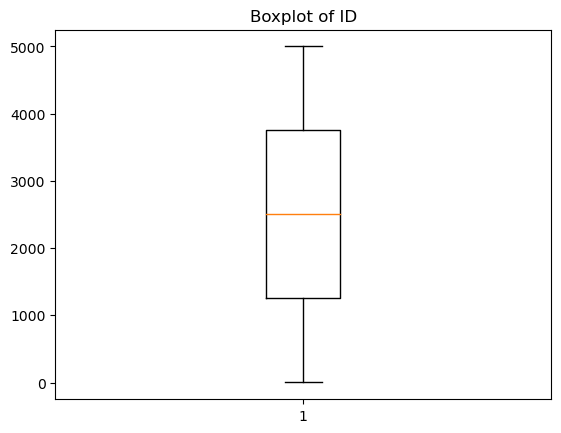

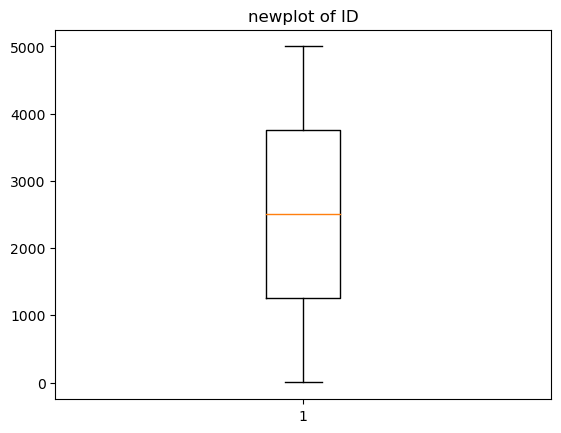

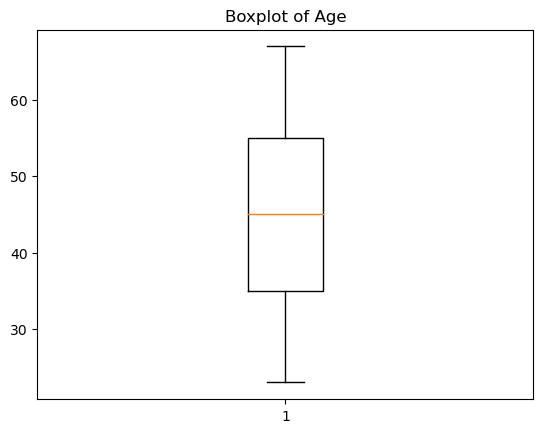

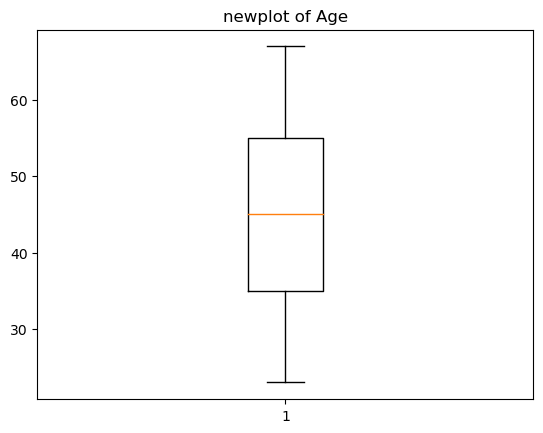

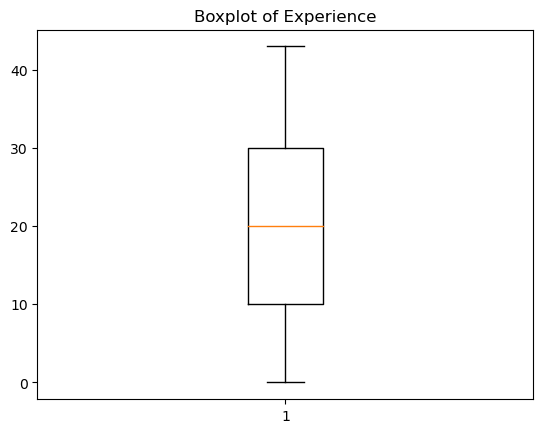

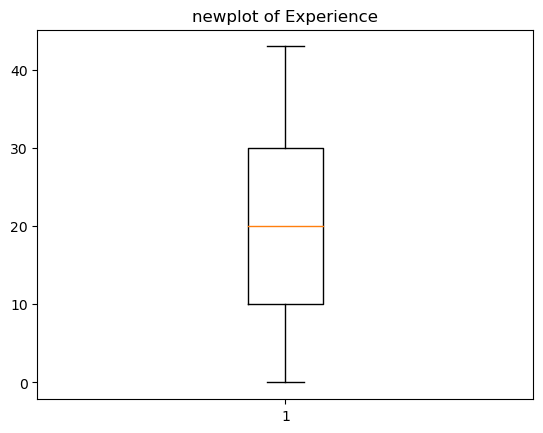

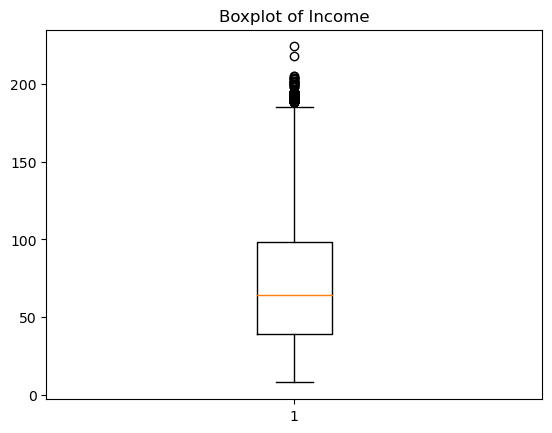

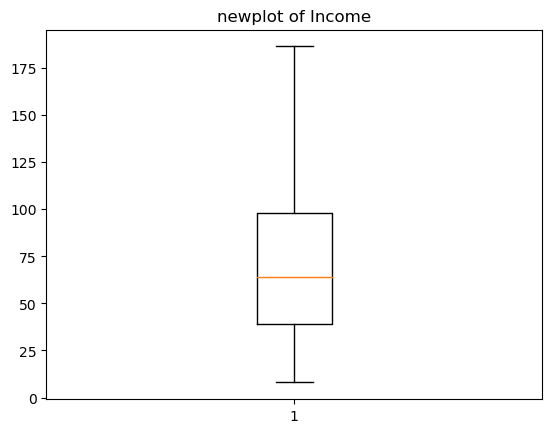

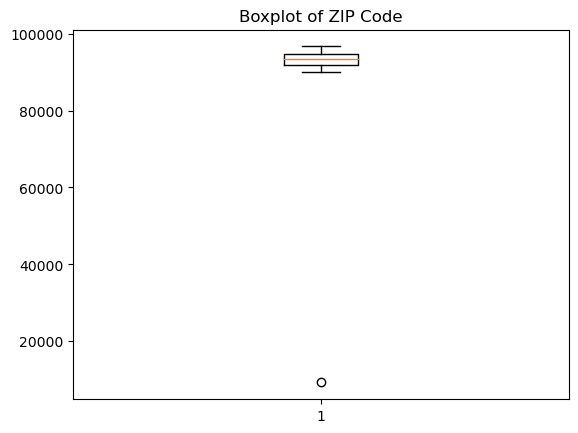

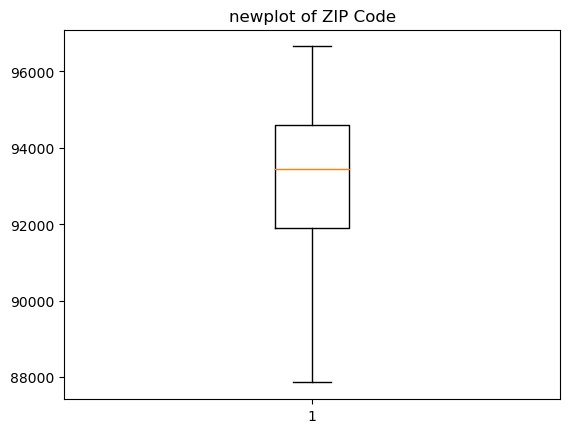

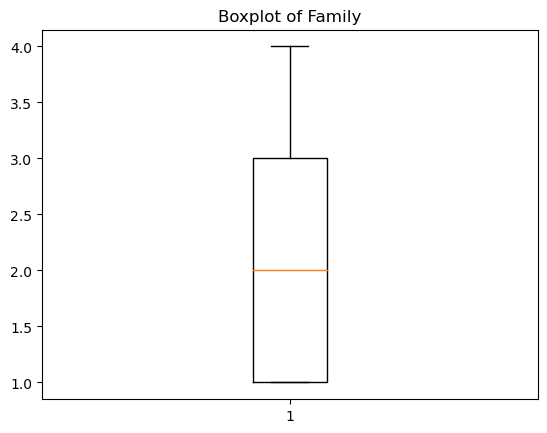

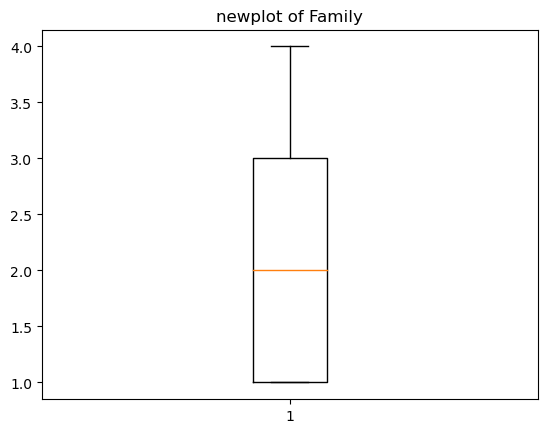

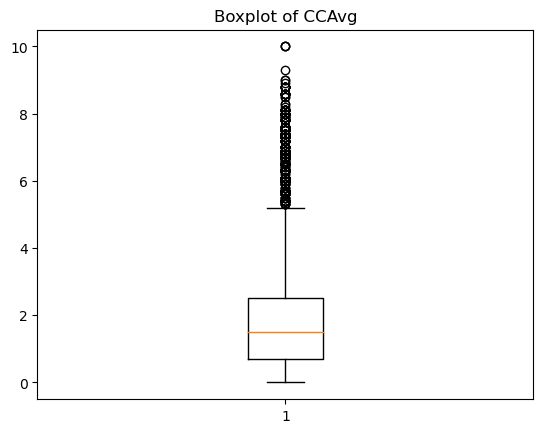

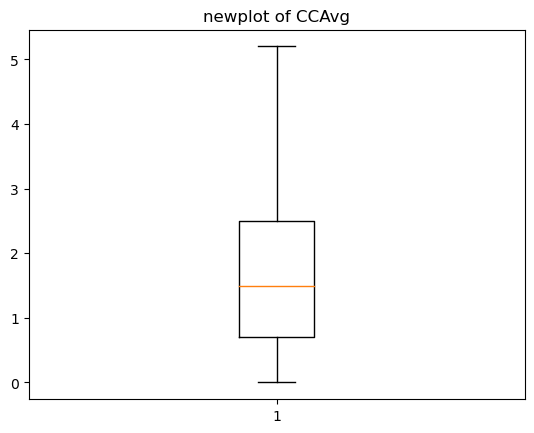

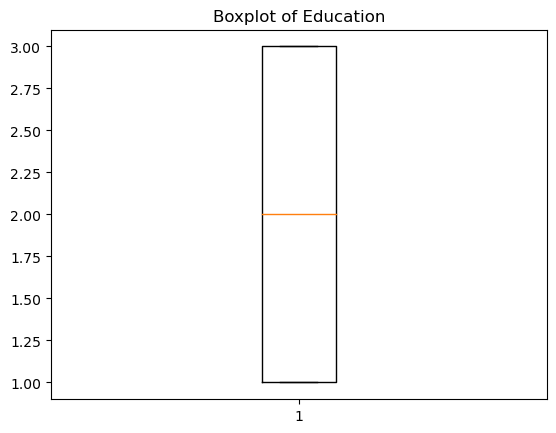

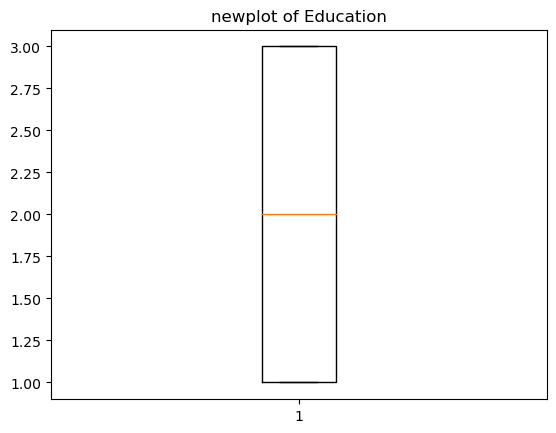

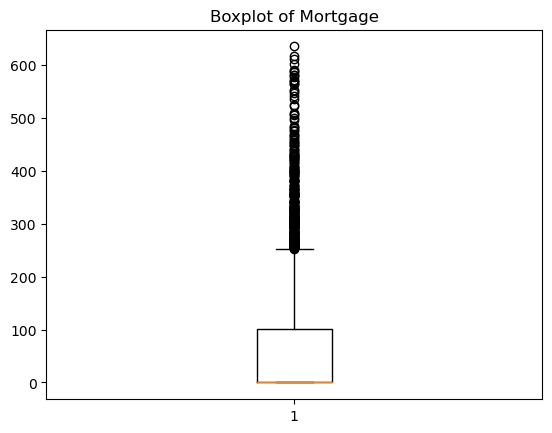

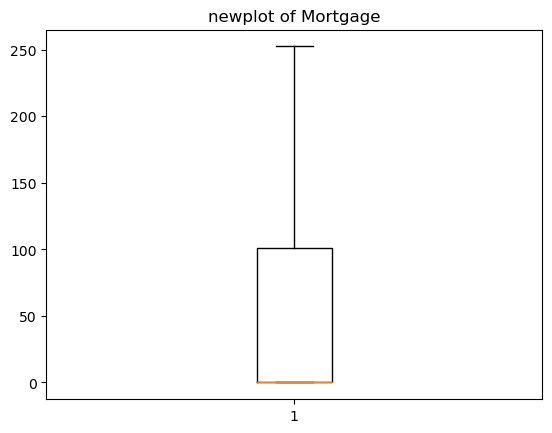

In [10]:
#Detecting & replacing outliers by lower and upper limit
columns_to_exclude = ['Personal Loan', 'Securities Account','CD Account','Online','CreditCard']

numerical_columns = data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    if column in columns_to_exclude:
        continue
    plt.boxplot(data[column])
    plt.title("Boxplot of "+column)
    plt.show()
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_limit = data[column].quantile(0.25) - (1.5 * IQR)
    upper_limit = data[column].quantile(0.75) + (1.5 * IQR)
    data[column] = np.clip(data[column], lower_limit, upper_limit) 
    plt.boxplot(data[column])
    plt.title("newplot of "+column)
    plt.show()

### EDA

#### Split the data into training and test set 

In [11]:
data.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [12]:
x=data.loc[:,data.columns!='Personal Loan']
y=data['Personal Loan']

In [13]:
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0.0,0,0,1,0
4996,30,4,15.0,4,0.4,1,85.0,0,0,1,0
4997,63,39,24.0,2,0.3,3,0.0,0,0,0,0
4998,65,40,49.0,3,0.5,2,0.0,0,0,1,0


In [14]:
x = pd.get_dummies(x,drop_first=True)
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0.0,0,0,1,0
4996,30,4,15.0,4,0.4,1,85.0,0,0,1,0
4997,63,39,24.0,2,0.3,3,0.0,0,0,0,0
4998,65,40,49.0,3,0.5,2,0.0,0,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=70)

In [16]:
x_train.shape,x_test.shape

((4000, 11), (1000, 11))

#### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=7,class_weight='balanced')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=7)

In [35]:
y_test_pred=model.predict(x_test)
y_test_pred

In [36]:
y_train_pred=model.predict(x_train)
y_train_pred

### Model Evaluation

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,roc_curve

#### Confusion Matrix

In [38]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[806  88]
 [ 16  90]]


In [39]:
print("Confusion Matrix1:")
print(confusion_matrix(y_train, y_train_pred))


Confusion Matrix1:
[[3219  407]
 [  34  340]]


In [40]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy_test:", accuracy_test)

Accuracy_test: 0.896


In [41]:
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy_train:", accuracy_train)

Accuracy_train: 0.88975


In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

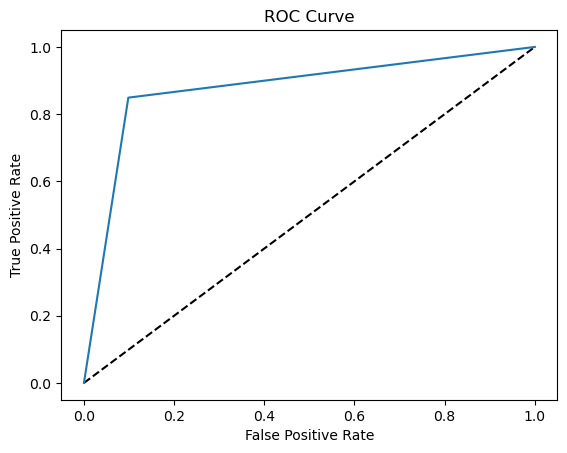

In [43]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [44]:
rec_test = recall_score(y_test, y_test_pred)
print("recall_score_test:", rec_test)

recall_score_test: 0.8490566037735849


In [45]:
rec_train = recall_score(y_train, y_train_pred)
print("recall_score_train:", rec_train)

recall_score_train: 0.9090909090909091


In [46]:
prec_test = precision_score(y_test, y_test_pred)
print("precision_score_test:", prec_test)

precision_score_test: 0.5056179775280899


In [47]:
prec_train = precision_score(y_train, y_train_pred)
print("precision_score_train:", prec_train)

precision_score_train: 0.45515394912985274


In [48]:
roc_test = roc_auc_score(y_test, y_test_pred)
roc_test

0.8753112996496559

In [32]:
roc_train = roc_auc_score(y_train, y_train_pred)
roc_train

0.8984230055658626

In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Confusion Matrix1:")
print(confusion_matrix(y_train, y_train_pred))
print("Accuracy_test:", accuracy_test)
print("Accuracy_train:", accuracy_train)
print("Recall_test:", rec_test)
print("Recall_train:", rec_train)
print("Precision_test:", prec_test)
print("Precision_train:", prec_train)
print("ROC AUC Score_test:", roc_test)
print("ROC AUC Score_train:", roc_train)

Confusion Matrix:
[[806  88]
 [ 16  90]]
Confusion Matrix1:
[[3219  407]
 [  34  340]]
Accuracy_test: 0.896
Accuracy_train: 0.88975
Recall_test: 0.8490566037735849
Recall_train: 0.9090909090909091
Precision_test: 0.5056179775280899
Precision_train: 0.45515394912985274
ROC AUC Score_test: 0.8753112996496559
ROC AUC Score_train: 0.8984230055658626
